In [1]:
!pip install -q -r requirements.txt

In [2]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

### Load data, only use the total_purchase_amt column

In [3]:
data=pd.read_csv('input/data.csv', index_col=0, parse_dates=[0])
print(data.shape)
data.head()

(427, 12)


,total_purchase_amt,total_redeem_amt,Interest_O_N,Interest_1_W,Interest_2_W,Interest_1_M,Interest_3_M,Interest_6_M,Interest_9_M,Interest_1_Y,mfd_daily_yield,mfd_7daily_yield
date,,,,,,,,,,,,
2013-07-01,0.165344,0.036072,4.456,5.423,6.040,6.8800,5.295,4.2390,4.2820,4.4125,1.5787,6.307
2013-07-02,0.147781,0.016678,3.786,4.750,5.074,5.8000,5.211,4.2344,4.2808,4.4070,1.5461,6.174
2013-07-03,0.138790,0.038872,3.400,4.242,4.658,5.2000,5.148,4.2300,4.2796,4.4022,1.4670,6.034
2013-07-04,0.093242,0.041854,3.348,3.938,4.464,5.1020,5.029,4.2287,4.2776,4.4000,1.4223,5.903
2013-07-05,0.059284,0.018043,3.380,3.816,4.295,4.7885,4.939,4.2273,4.2749,4.4000,1.3845,5.739


In [4]:
train=data.iloc[:-30 ]['total_purchase_amt']
test=data.iloc[-30: ]['total_purchase_amt']
print(train.shape, test.shape)


(397,) (30,)


### train the model

In [5]:
model = ARIMA(train, order=(2, 0, 1))
model=model.fit()


/home/bo/mydev/purchase_redemption/.conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/bo/mydev/purchase_redemption/.conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/bo/mydev/purchase_redemption/.conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/bo/mydev/purchase_redemption/.conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/bo/mydev/purchas

### results

At first glance, the training's fitted values may appear satisfactory. However, upon closer examination, it becomes evident that these fitted values consistently lag slightly behind the ground truth. This discrepancy can significantly impact the usefulness of our predictions. We can see this for the test prediction.

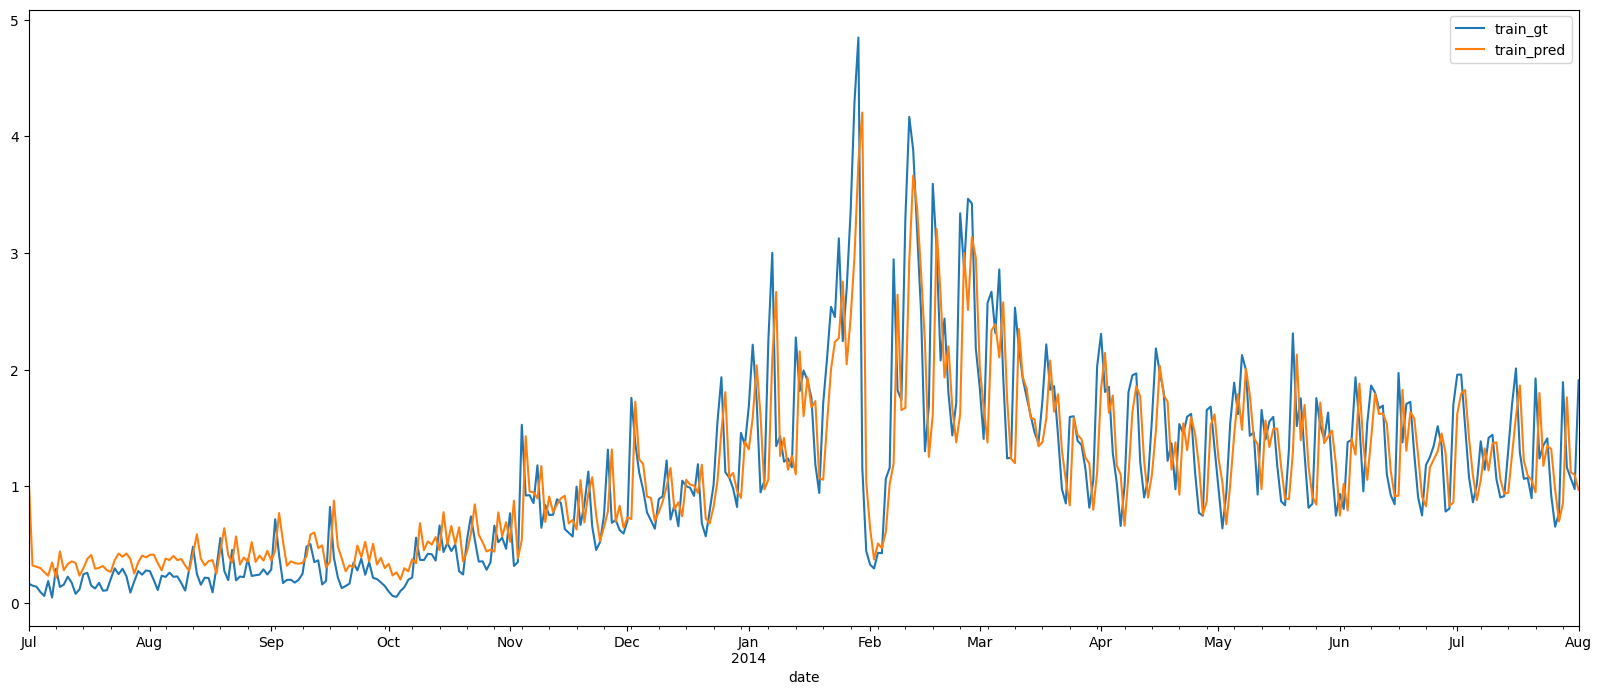

In [6]:

train_pred=model.fittedvalues
pd.concat([train, train_pred], axis=1).plot(figsize=(20, 8))
plt.legend(['train_gt', 'train_pred'])


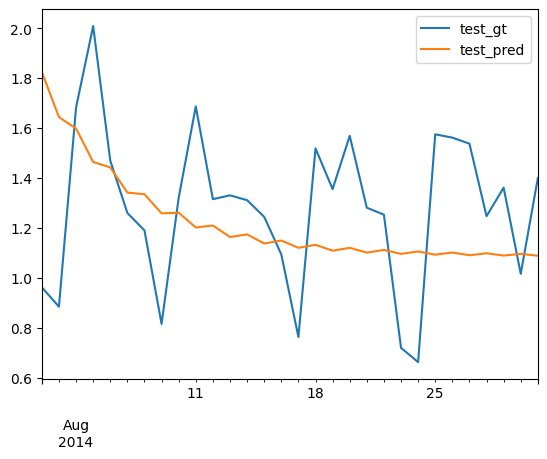

In [7]:
test_pred=model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)
pd.concat([test, test_pred], axis=1).plot()
plt.legend(['test_gt', 'test_pred'])